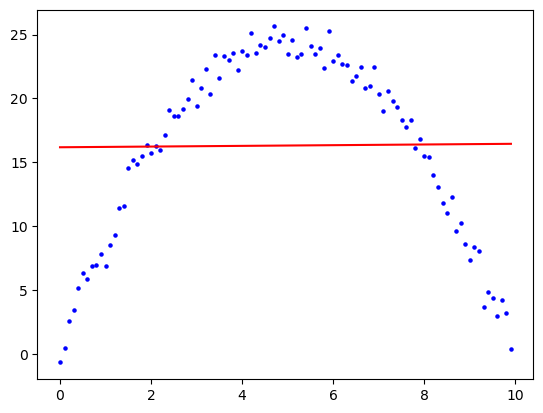

La correlación es de 0.011


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# rho only measures linear dependence, not dependence in general
def fun_quadratic(x):
    xmax = np.max(x)
    return x * (xmax - x) + np.random.normal(0, 0.1 * xmax, len(x))

np.random.seed(456)
x = np.arange(0, 10, 0.1)
y = fun_quadratic(x)

# Plotting
plt.scatter(x, y, color='blue', s=5)
slope, intercept, _, _, _ = linregress(x, y)
plt.plot(x, intercept + slope * x, color='red')  # linear regression line
plt.show()

# Print correlation
print(f"La correlación es de {np.corrcoef(x, y)[0, 1]:.3f}")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# Read the data from the URL, the California housing dataset

# 1. longitude: A measure of how far west a house is; a higher value is farther west
# 2. latitude: A measure of how far north a house is; a higher value is farther north
# 3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
# 4. totalRooms: Total number of rooms within a block
# 5. totalBedrooms: Total number of bedrooms within a block
# 6. population: Total number of people residing within a block
# 7. households: Total number of households, a group of people residing within a home unit, for a block
# 8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
# 9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
# 10. oceanProximity: Location of the house w.r.t ocean/sea

housing = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')

# See the structure of the data
print(housing.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [18]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


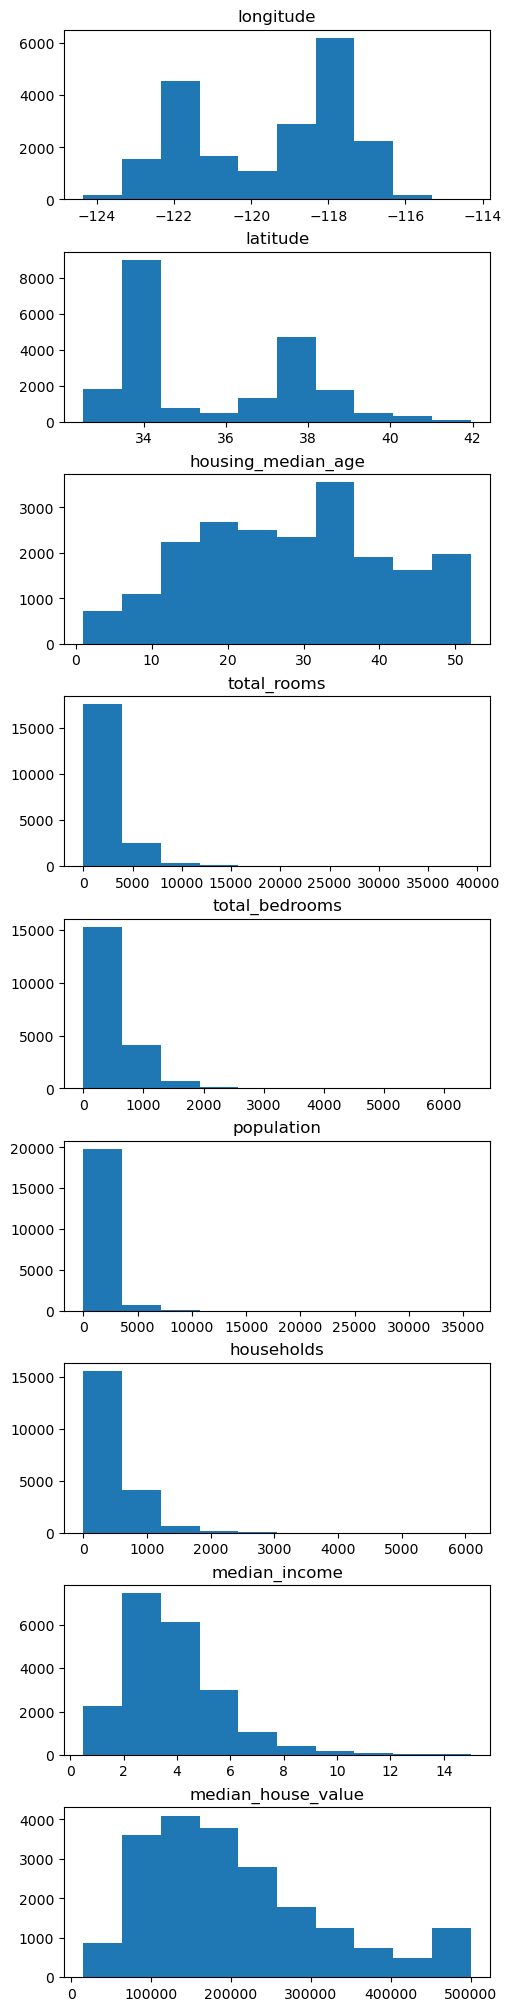

In [17]:
# Create a list of all variables except ocean proximity
vars_to_plot = [var for var in housing.columns if var != 'ocean_proximity']

# Create a figure and a subplot for each variable
fig, axes = plt.subplots(nrows=len(vars_to_plot), ncols=1, figsize=(5, 20),constrained_layout=True)

# Plot a histogram for each variable
for i, var in enumerate(vars_to_plot):
    axes[i].hist(housing[var])
    axes[i].set_title(var)

# Show the plot
plt.show()

Variables del data set housing

households: número de hogares en el bloque censal

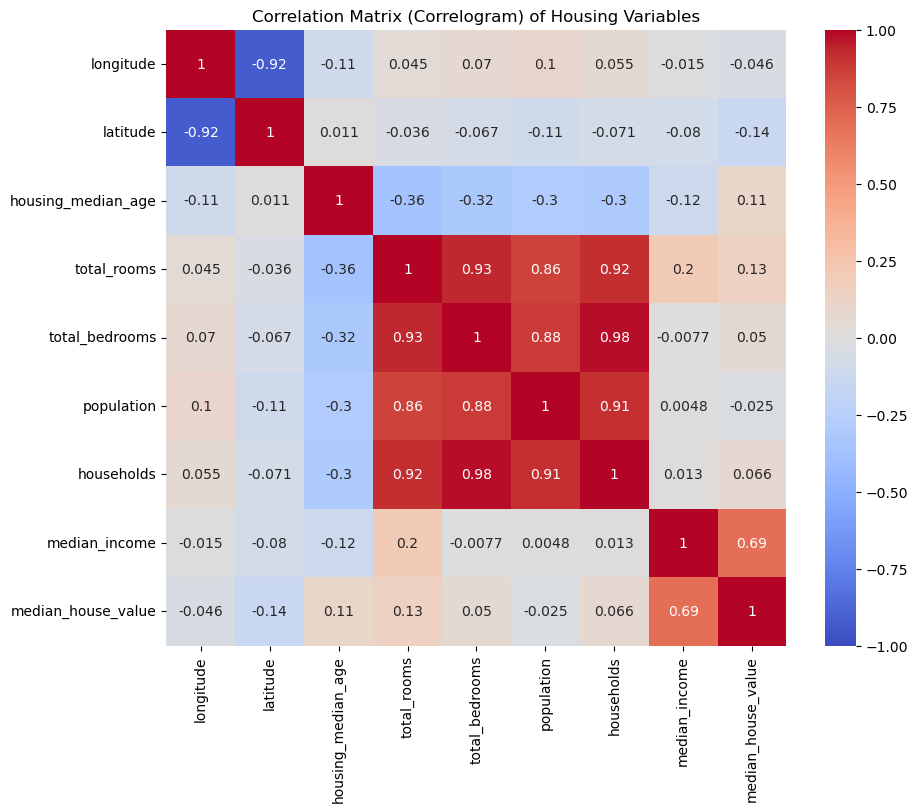

In [5]:
import seaborn as sns
# Compute the correlation matrix excluding 'ocean_proximity'
corr_matrix = housing.drop('ocean_proximity', axis=1).corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Correlogram) of Housing Variables')
plt.show()

In [6]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [7]:
# sort the correlation matrix by the correlation with median_house_value
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [8]:
correlations = corr_matrix['median_house_value'].sort_values(ascending=False)
correlations[correlations.abs() > 0.1].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
latitude             -0.144160
Name: median_house_value, dtype: float64